<h1> Project: Investigating a dataset. </h1>

**I this notebook we will investigate The Movie Database (TMDB) provided by Udacity.**

<h2>Table of Contents.</h2>
<ul> 
<li><a href="#intro"> Introduction. </a></li>
<li><a href="#gath"> Gathering stuff. </a></li>
<li><a href="#walk"> Walking through the data. </a>
    <ul>
    <li><a href="#walk"> Basic information about the dataset.</a></li>
    <li><a href="#quest"> Questions List.</a>
        <ul> 
        <li><a href="#pvg"> Which genres are most popular? </a></li>
        <li><a href="#mpm"> What is the most popular movie each year? </a></li>
        <li><a href="#kohr"> What kinds of properties are associated with movies that have high revenues? </a></li>
        </ul></ul></li>
    
<li><a href="#conc"> Conclusions. </a></li>
</ul>

<a id='intro'></a>

<h2>Introduction.</h2>

<p> I guess all of us like movies. Whether you're a student -like I am- or a hardworker, male, female, a partner or a parent, you probably like movies. Movies like music, has alot of genres so it satisfy most of tastes. Watch movies, watch more, ask people, much, and you'll end with your favourite kind, you'll also have an overveiw about movies, their genres, popularity, fans and much more. We'll do something similar here in this notebook. By analyzing the data from TMDB We'll end up knowing much stuff that can be helpful finding our joy, The Joy of Movies. </p>

<a id='gath'></a>

<h2> Importing libraries and loading the dataset. </h2>

In [221]:
# Using this cell to set up import statements for all of the packages, the datasets and topics that are considered to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

"""Changing scientific numbers to numeric numbers"""
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

<a id='walk'></a>

<h2>Brief information list about our dataset:</h2>

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [223]:
df[['popularity', 'runtime', 'budget_adj', 'revenue_adj']].describe()
#Seems slightly off, let's clean and try again..

,popularity,runtime,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00
mean,0.65,102.07,17551039.82,51364363.25
std,1.00,31.38,34306155.72,144632485.04
min,0.00,0.00,0.00,0.00
25%,0.21,90.00,0.00,0.00
50%,0.38,99.00,0.00,0.00
75%,0.71,111.00,20853251.08,33697095.72
max,32.99,900.00,425000000.00,2827123750.41


<h1> Overview and Notes about the dataset: </h1>

**This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.**

* Certain columns, like ‘cast’
  and ‘genres’, contain multiple
  values separated by pipe (|)
  characters.

* There are some odd characters
  in the ‘cast’ column. Didn’t worry
  about cleaning them. Just
  left them as they were.

* The final two columns ending
  with “_adj” show the budget and
  revenue of the associated movie
  in terms of 2010 dollars,
  accounting for inflation over
  time.


<h2>Provided the data from <a href="#walk">info and describe tables</a> we conclude that there's wrong data, cells with 'NaN' or zero values that need to be cleaned.</h2> 
<h3>Cells in budget/_adj , revenue/_adj, and runtime shall be replaced with 'NaN', then dropped.</h3>

In [224]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [225]:
df[['popularity', 'runtime', 'budget_adj', 'revenue_adj']].describe()

,popularity,runtime,budget_adj,revenue_adj
count,1287.00,1287.00,1287.00,1287.00
mean,1.79,110.27,54629935.84,199177499.23
std,2.17,18.81,55254627.64,296851462.45
min,0.01,63.00,0.97,43.00
25%,0.66,97.00,15191799.51,27648902.20
50%,1.15,107.00,35569267.40,86747695.58
75%,2.13,121.00,76301250.18,235117806.64
max,32.99,201.00,425000000.00,2827123750.41


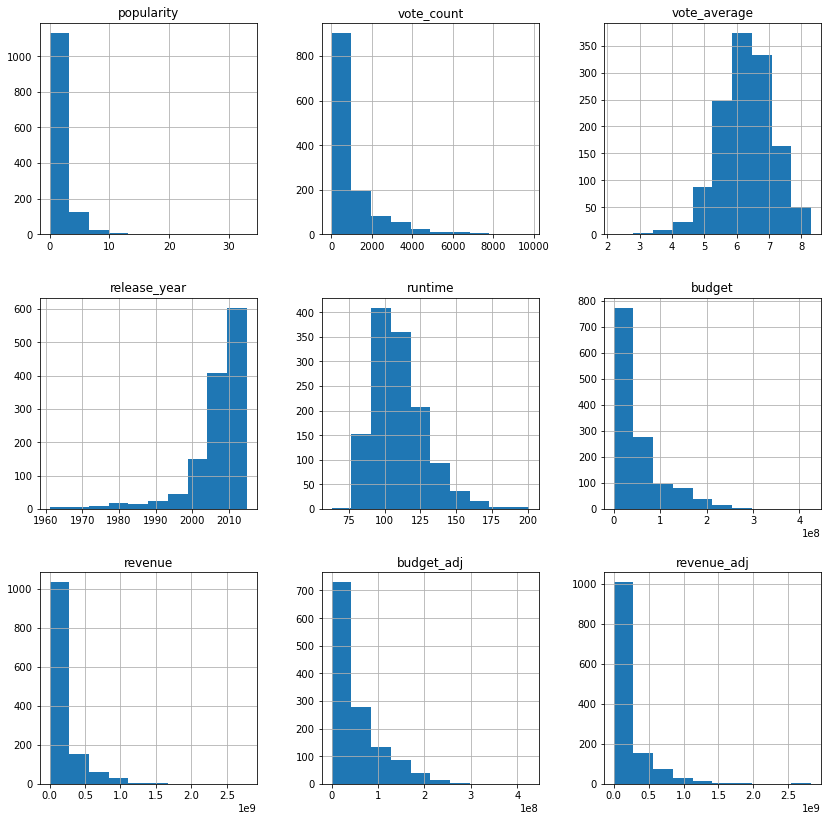

In [226]:
df[['popularity','vote_count', 'vote_average', 'release_year', 'runtime', 'budget', 'revenue', 'budget_adj', 'revenue_adj']].hist(figsize=(14,14));

<h3> The previous histograms shows interesting information, such as most of movies' estimated revenue are below 500 millions while their budget were under 100 millions. </h3>

<a id='quest'></a>

<h1>Questions: </h1>

<ul> 
<li><a href="#pvg"> Which genres are most popular? </a></li>
<li><a href="#mpm"> What is the most popular movie each year? </a></li>
<li><a href="#kohr"> What kinds of properties are associated with movies that have high revenues? </a></li>
</ul>

<a id='pvg'></a>
<h2> Here We can see some results matching popularity with genres, from which We indecate how relative a genre is to popularity.</h2>

In [227]:
pvg = df.set_index('popularity').sort_index(axis=0, level=None, ascending=False).head(10)['genres']
pvg #popularity versus genre

popularity
32.99    Action|Adventure|Science Fiction|Thriller
28.42    Action|Adventure|Science Fiction|Thriller
24.95              Adventure|Drama|Science Fiction
14.31             Action|Science Fiction|Adventure
13.11           Adventure|Science Fiction|Thriller
12.97             Action|Adventure|Science Fiction
12.04             Adventure|Action|Science Fiction
11.42                              Action|Thriller
11.17     Action|Adventure|Science Fiction|Fantasy
10.74           Science Fiction|Adventure|Thriller
Name: genres, dtype: object

<h3> Here We count how much a genre is related to the most popluar movies. </h3>

**Taking the ten most popular movies.**
* 90% Sci-Fi.
* 90% Adventure. 
* 70% Action. 
* 50% Thriller. 
* 10% Fantasy. 
* 10% Drama. 

In [228]:
def pvgf(pvg, ptype, title, xlabel, ylabel): #popularity vs genre function

    '''Takes a Series, split object by pipe (|), append the splitted items to a container to be counted.'''
    
    container = []
    for i in pvg:
        for j in i.split("|"):
            container.append(j)

    if ptype == "scatter":
        sns.scatterplot(data = container)
    else:
        sns.displot(container);
    plt.xticks(rotation=90);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

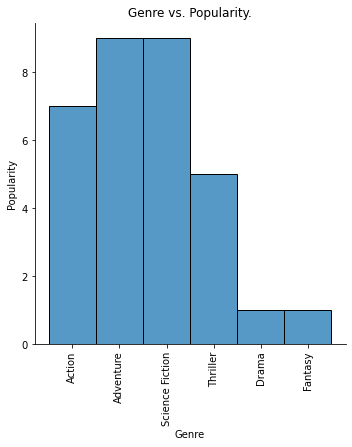

In [229]:
pvgf(pvg,"", "Genre vs. Popularity.", "Genre", "Popularity")

<h3> Here we see the most commonly liked genres, sci-fi, adventure, and action </h3>

<a id='mpm'></a>
<h1> What's the most popular movie, year by year. </h1>

**Provides a list of Movie Of the Year, from 1960 to 2015.**

In [230]:
mpm = pd.DataFrame(columns=['id','imdb_id','popularity','budget','revenue',
'original_title','cast','homepage','director','tagline','keywords','overview',
'runtime','genres','production_companies','release_date','vote_count',
'vote_average','release_year','budget_adj','revenue_adj']).set_index('popularity')

for i in np.sort(df['release_year'].unique()):
    mpm = pd.concat([mpm, df[df['release_year'] == i].set_index('popularity').sort_index(axis = 0, ascending = False).head(1)])

mpm #most popular movie

,id,imdb_id,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,,,,,,,,,,,,,,,,,,,,
0.30,430,tt0055256,3000000.00,4000000.00,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,berlin|prison|clerk|atlanta|cold war,"One, Two, Three â€“ A scorching business comed...",115.00,Comedy|Family,The Mirisch Corporation,12/15/61,30,7.50,1961,21884583.62,29179444.83
3.17,646,tt0055928,1100000.00,59600000.00,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,london|england|assassination|spy|casino,"In the film that launched the James Bond saga,...",110.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.70,1962,7929293.77,429623553.17
2.51,657,tt0057076,2500000.00,78898765.00,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,venice|london|terror|england|assassination,Agent 007 is back in the second installment of...,115.00,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.70,1963,17800448.43,561773358.99
3.15,658,tt0058150,3500000.00,124900000.00,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,secret organization|secret intelligence servic...,Special agent 007 (Sean Connery) comes face to...,110.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.00,1964,24605935.94,878080399.54
1.91,660,tt0059800,11000000.00,141195658.00,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,paris|florida|fighter pilot|sanatorium|secret ...,A criminal organization has obtained two nucle...,130.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.30,1965,76126200.63,977153544.47
1.55,667,tt0062512,9500000.00,111584787.00,You Only Live Twice,Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...,http://www.mgm.com/view/movie/2347/You-Only-Li...,Lewis Gilbert,You Only Live Twice...and Twice is the only wa...,london|japan|england|assassination|helicopter,A mysterious space craft kidnaps a Russian and...,117.00,Action|Thriller|Adventure,Eon Productions,6/12/67,301,6.20,1967,62099255.53,729403389.57
1.78,668,tt0064757,7000000.00,81974493.00,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,london|suicide|england|switzerland|secret iden...,James Bond tracks archnemesis Ernst Blofeld to...,142.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.40,1969,41609849.41,487278044.15
1.76,681,tt0066995,7200000.00,116000000.00,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,http://www.mgm.com/view/movie/529/Diamonds-Are...,Guy Hamilton,The man who made 007 a household number,satellite|plastic surgery|smuggling|murder|ext...,Diamonds are stolen only to be sold again in t...,120.00,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/13/71,331,6.20,1971,38773403.38,624682610.07
5.74,238,tt0068646,6000000.00,245066411.00,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,italy|love at first sight|loss of father|patri...,"Spanning the years 1945 to 1955, a chronicle o...",175.00,Drama|Crime,Paramount

<a id='kohr'></a>
<h1> Properties associated with high revenue movies. </h1>

**Taking Inflation into Account**

<h3> Top 10 movies with highest revenue. </h3>

In [231]:
rrdf = df.set_index('revenue_adj').sort_index(axis=0, level=None, ascending=False).head(10)
rrdf #revenue related dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,,,,,,,,,,,
2827123750.41,19995,tt0499549,9.43,237000000.00,2781505847.00,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162.00,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10,2009,240886902.89
2789712242.28,11,tt0076759,12.04,11000000.00,775398007.00,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121.00,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.90,1977,39575591.36
2506405735.42,597,tt0120338,4.36,200000000.00,1845034188.00,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194.00,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.30,1997,271692064.21
2167324901.20,9552,tt0070047,2.01,8000000.00,441306145.00,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,exorcism|holy water|religion and supernatural|...,12-year-old Regan MacNeil begins to adapt an e...,122.00,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.20,1973,39289276.63
1907005841.92,578,tt0073195,2.56,7000000.00,470654000.00,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124.00,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.30,1975,28362748.20
1902723129.80,140607,tt2488496,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04
1791694309.25,601,tt0083866,2.90,10500000.00,792910554.00,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,farewell|homesickness|nasa|extraterrestrial te...,A science fiction fairytale about an extra-ter...,115.00,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.20,1982,23726245.23
1443191435.21,24428,tt0848228,7.64,220000000.00,1519557910.00,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143.00,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.30,2012,208943741.90
1424626187.77,1891,tt0080684,5.49,18000000.00,538400000.00,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,rebel|asteroid|space battle|snow storm|space c...,"The epic saga continues as Luke Skywalker, in ...",124.00,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox

<h3> Properties like gnere, keywords, runtime, production company, cast, and director can be analyzed graphically using the previously defined functoin (pvgf) to avoid repeating code. </h3>

<h2> The most profit making genres. </h2>

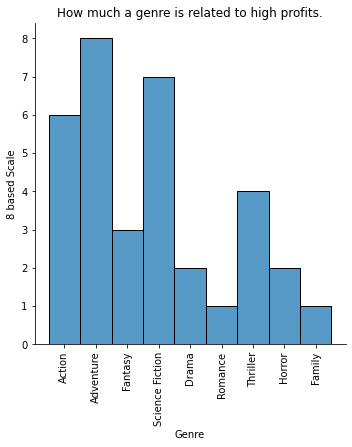

In [232]:
pvgf(rrdf['genres'],"", "How much a genre is related to high profits.", "Genre", "8 based Scale")

<h3> The most profit making genre appears to be one of the most popular also, it's adventure, then comes sci-fi and action as well. </h3>

<h2> The most profit making directors. </h2>

**In individual movies**

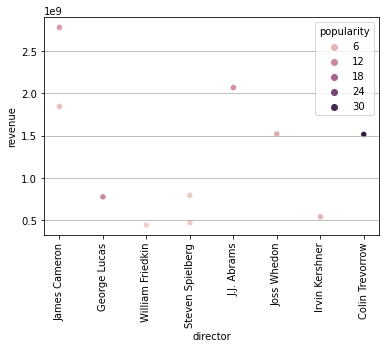

In [233]:
sns.scatterplot(x= 'director', y= 'revenue', data= rrdf, hue= 'popularity');
plt.xticks(rotation=90);
plt.grid(axis= 'y');


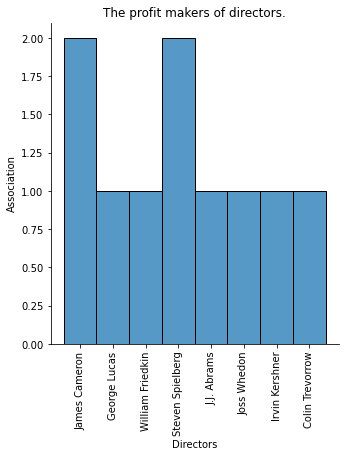

In [234]:
pvgf(rrdf['director'].head(10),"", "The profit makers of directors.", "Directors", "Association");

<h3> From the previous two figures, We knew that James Cameron and Steven Spielberg were the most profit makers, though either of them was the direcor of the most popular Jurassic World, but Colin Trevorrow was. James' movies are more popular than Steven's, and the most popular and profit makers were J.J. Abrams and George Lucas.</h3>

<h2> Frequently used keywords that describes high revenue movies. </h2>

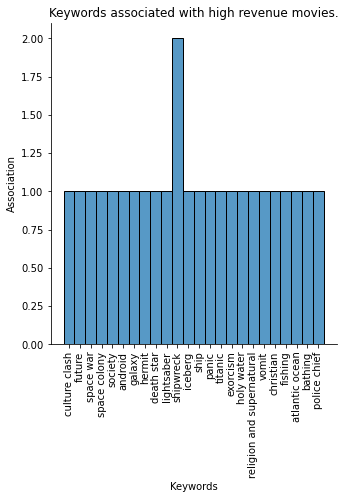

In [235]:
pvgf(rrdf['keywords'].head(5),"", "Keywords associated with high revenue movies.", "Keywords", "Association");

<h3> Shipwreck seems to be the most frequent </h3>

<h2> The most profit making production companies. </h2>

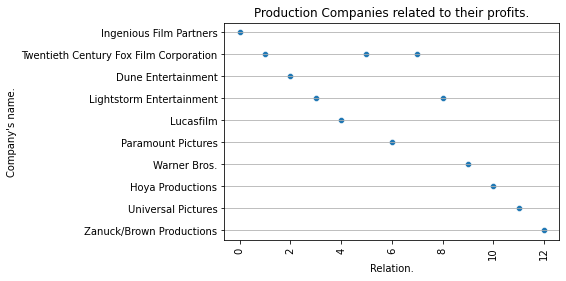

In [236]:
pvgf(rrdf['production_companies'].head(5),"scatter", "Production Companies related to their profits.", "Relation.", "Company's name.");
plt.grid(axis='y')

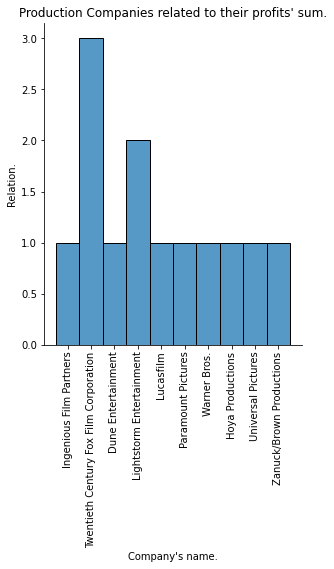

In [237]:
pvgf(rrdf['production_companies'].head(5),"", "Production Companies related to their profits' sum.", "Company's name.", "Relation.");


<h3> 20th Century Fox productions and Lightstorm Entertainment seems to be the most profit makers </h3>

<h2> A heatmap to view the different corelations between the properties. </h2>

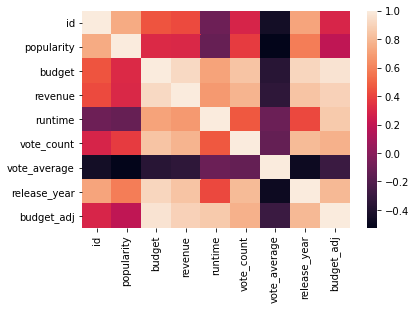

In [238]:
sns.heatmap(rrdf.corr());

<h3> As we see there's positive corelation between budget and each of revenue, release year, vote count and alittle with runtime. We see also that popularity isn't related much to almost any of the given properties. </h3>

<a id='conc'></a>

<h2>Conclusions:</h2>

<p> We can easily conclude that the most popular genres are sci-fi, adventure, then comes action and thriller. We see that most movies recieved between 0 to 1000 votes with rated that are around 6. Most of the movies also were released between 2005 to 2015 -The recent 10 years-, and that shows the positive rate of change of released-movies-count year by year. The mean value of runtime was 110 minutes -1hr, 50min-, the shortest film was  63-minutes-long and the longest was 201 minutes -3hrs, 21min-. The most popular movie in the list was Jurassic World with score of 32.99, 425 millions as estimated budget and 2.8 billions as estimated revenue.The most profit-makers of directors were James Cameron and Steven Spielberg, We saw that the keyword "shipwrech" was the most frequent among the revenue-maker movies, and the most profit making production company was 20th Century Fox Film Corp. . </p>

*The key takeaways from this exploration are that a movie made by James Cameron and from the Adventure genre is likely to be a great success, especially if made by 20th century fox film company.*

**The used dataset is outdated, has no forign movies, and lost data, so it may be biased somehow.**